In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [8]:
data = pd.read_csv('sku-subset.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
1,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
2,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
3,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI
4,15,2301,004,400000015000,126 MDU461,255CAMEL,12,1,23272,JONES/LA


In [11]:
brand_names = data.iloc[:, -1].unique()
brand_names[:5]


array(['TURNBURY ', 'C A SPOR ', 'BEAU IDE ', 'HARTSTRI ', 'JONES/LA '],
      dtype=object)

In [13]:
import pandas as pd
import spacy
from sklearn.cluster import KMeans
import numpy as np

In [23]:
# Load SpaCy's pre-trained model for generating word embeddings
nlp = spacy.load("en_core_web_sm")

# Function to generate embeddings
def get_embeddings(text):
    return nlp(text).vector

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


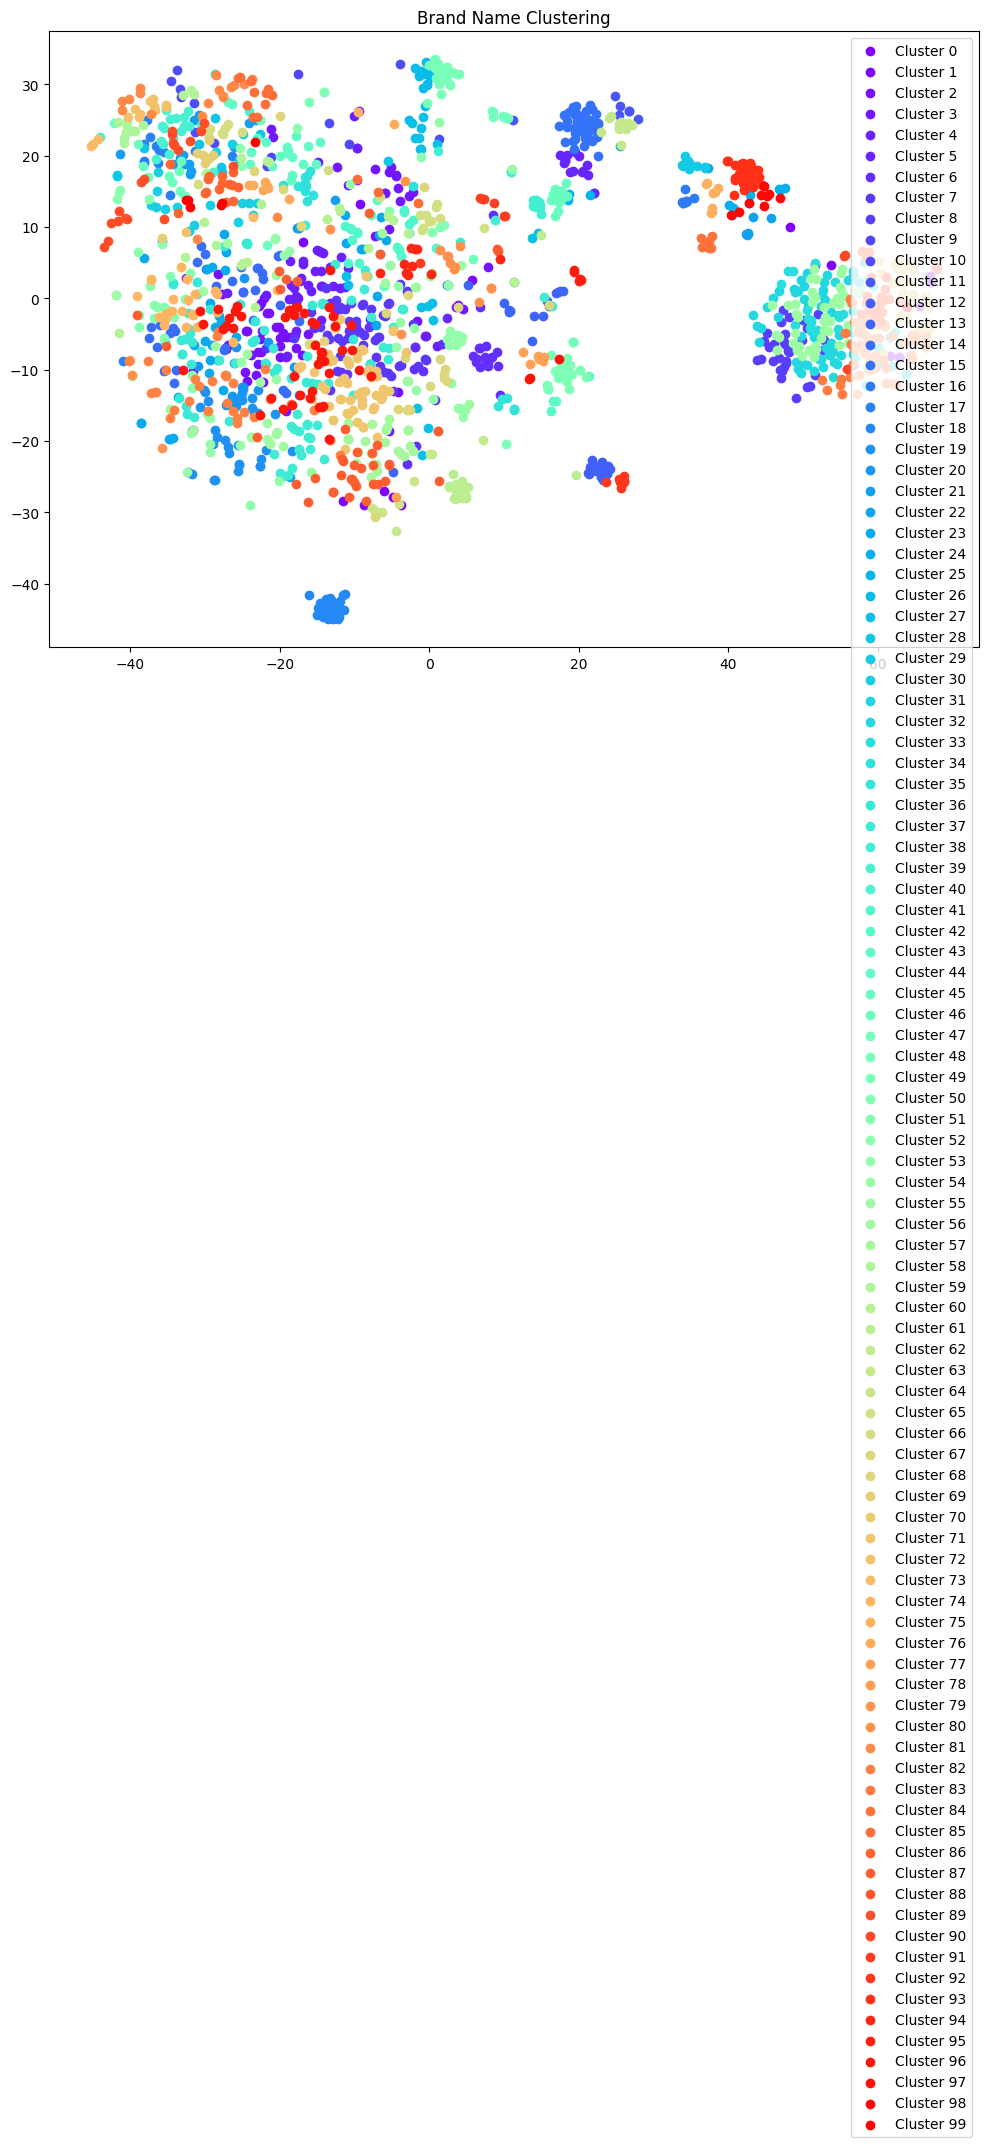

In [31]:
from sklearn.manifold import TSNE

# Generate embeddings for each unique brand
brand_embeddings = [get_embeddings(brand) for brand in brand_names]
brand_embeddings_array = np.vstack(brand_embeddings)  # Convert to a 2D NumPy array

# Applying K-means clustering on these embeddings
n_clusters = 100  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(brand_embeddings_array)

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings = tsne.fit_transform(brand_embeddings_array)

# Plotting the results
plt.figure(figsize=(12, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    idx = kmeans.labels_ == i
    plt.scatter(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], color=colors[i], label=f'Cluster {i}')
plt.title('Brand Name Clustering')
plt.legend()
plt.show()

In [32]:
# Assign each brand to a cluster
clustered_brands = {}
for i, label in enumerate(kmeans.labels_):
    brand = brand_names[i]
    if label not in clustered_brands:
        clustered_brands[label] = [brand]
    else:
        clustered_brands[label].append(brand)

# Displaying the first few clusters
for i in range(min(n_clusters,5)):  # Displaying the first 5 clusters for brevity
    print(f"Cluster {i}: {clustered_brands.get(i, [])}\n")

Cluster 0: ['DIM      ', 'SESSA    ', 'ZELDA    ', 'THIERRY  ', 'POP      ', 'ORVIS    ', 'CRYSTAL  ', 'NISSI    ', '1720P3A  ']

Cluster 1: ['WESTPOIN ', 'THIRSTYS ', 'SELANDIA ', 'CROSSROA ', 'TRAVELON ', 'DAKINI', 'CHURCHGI ', 'CORTLAND ']

Cluster 2: ['K STUDIO ', 'URBAN ME ', 'J SHADOW ', 'DAVID ME ', 'GIRL PLA ', 'WOLFF SH ', 'AUGUST H ', 'STUDIO D ', 'FOX RACI ', 'VCS GROU ', 'TEAM JEA ', 'COOL WAT ', 'JEAN DES ', 'AMER ANG ', 'ROYCE HO ', 'MUDD LLC ', 'RAIDER J ', 'IT JEANS ', 'LTB BY L ', 'A.H. SCH ', 'MORRIS K ', 'BABY JAN ', 'MARY FRA ', 'SIDE SAD ', 'MV SPORT ', 'BABY GUE ', 'KELLY JO ', 'LEVEL JE ', 'TRANS AP ', 'DOCTOR D ', 'GLOBE PE ', 'JEAN PAT ', 'ELLIOT L ', 'TEAM GOL ', 'LAD GROU ', 'YSL BEAU ', 'SUN SPIR ', 'MINE DES ', 'DREAM AP ', 'EMILIO H ', 'GREEN TE ', 'MELE MFG ', 'THOMAS J ', 'ENJOY LI ']

Cluster 3: ['TIMBERLA ', 'TELLURID ', 'NATURALI ', 'CALIFORN ', 'LITTLELA ', 'WOOLRICH ', 'EXCLUSIV ', 'PORTMEIR ', 'SHEDRAIN ', 'RHAPSODY ', 'ONEWORLD ', 'WESTBOUN ', 'TU